# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

plt.scatter(X,Y)

In [2]:
# slope: m_hat
# intercept: c_hat
# prediction: y_hat
# R-squared: r_sq

#####################
### slope: m_hat ###

def calc_slope(xs,ys):
    
    n = np.mean(xs)*np.mean(ys) - np.mean(xs*ys)
    d = (np.mean(xs)**2) - np.mean(xs**2)
    m = n/d
    return m
m = calc_slope(X,Y)
print("Slope (m):",m)

########################
### intercept: c_hat ###

def best_fit(xs,ys):
    y_bar = np.mean(ys) 
    m_hat = calc_slope(xs,ys) 
    x_bar = np.mean(xs)
    c = y_bar - m_hat*x_bar
    return c
c = best_fit(X,Y)
print("intercept (c):", c)


#########################
### prediction: y_hat ###

def reg_line (m, c, xs):
    Y_pred = []
    for x in xs:
        reg = m*x + c
        Y_pred.append(reg)
    return Y_pred

Y_pred = reg_line(m,c,X)
print("y_hat (regline):", Y_pred)


#######################
### R-squared: r_sq ###

# squared error:
def sq_err(Y, Y_pred):
    ss_res = sum((Y - Y_pred)**2)
    return ss_res
ss_res = sq_err(Y, Y_pred)
print("ss_res:",ss_res)

def r_squared(y_real, y_predicted):   
    y_mean = np.mean(y_real)
    ss_tot = sum((y_real - y_mean)**2)
    ss_res = sq_err(y_mean, y_predicted)
    r_sq = ss_res/ss_tot
    return r_sq 
r_sq = r_squared(Y, Y_pred)
print("R-squared: ", r_sq)

Slope (m): 0.5575757575757568
intercept (c): 6.3333333333333375
y_hat (regline): [6.890909090909094, 7.448484848484851, 8.006060606060608, 8.563636363636364, 9.121212121212121, 9.67878787878788, 10.236363636363635, 10.793939393939393, 11.351515151515148, 11.909090909090907]
ss_res: 0.7515151515151492
R-squared:  0.9715335169880601


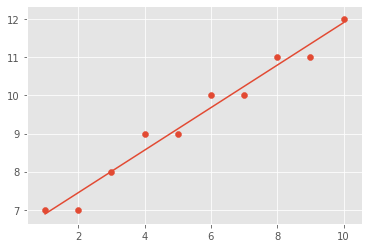

In [3]:
# R-Squared Model
reg_plot = plt.figure()
ax = reg_plot.add_subplot(111)
ax.plot(X, Y_pred)
ax.scatter(X,Y)
plt.show()

In [4]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

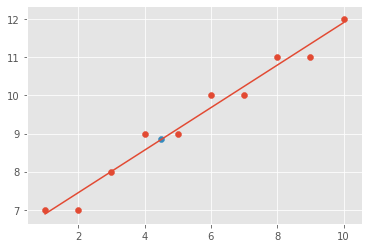

In [5]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x_new = 4.5
y_new = 0.56 * x_new + 6.33


reg_plot = plt.figure()
ax = reg_plot.add_subplot(111)
ax.plot(X, Y_pred)
ax.scatter(X,Y)
ax.scatter([x_new], [y_new])
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [12]:
# Level up

import pandas as pd
df = pd.read_csv('heightWeight.csv')
print(df.describe())
print(df)

          height      weight
count  20.000000   20.000000
mean   66.850000  165.800000
std     5.112163   28.971129
min    58.000000  115.000000
25%    63.250000  143.750000
50%    68.500000  170.000000
75%    71.000000  192.750000
max    74.000000  210.000000
    height  weight
0       68     165
1       71     201
2       61     140
3       69     170
4       71     192
5       58     125
6       72     195
7       73     205
8       58     115
9       74     210
10      61     135
11      59     125
12      69     172
13      68     175
14      64     145
15      69     170
16      72     200
17      66     155
18      65     150
19      69     171


In [14]:
# Reg Model Data Summary for Height and Weight:
# height = independent variable (X)
# weight = dependent variable (Y)

# m = calc_slope(X,Y)
# c = best_fit(X,Y)
# Y_pred = reg_line(m,c,X)
# ss_res = sq_err(Y, Y_pred)
# r_sq = r_squared(Y, Y_pred)

x_height = np.array(df['height'])
y_weight = np.array(df['weight'])

m = calc_slope(x_height, y_weight)
c = best_fit(x_height, y_weight)
y_pred = reg_line(m, c, x_height)
ss_res = sq_err(y_weight, y_pred)
r_sq = r_squared(y_weight, y_pred)

print("Slope: ", m)
print("Y-intercept: ", c)
print("R-squared: ", r_sq)


Slope:  5.539019232705614
Y-intercept:  -204.48343570637024
R-squared:  0.955309928867348


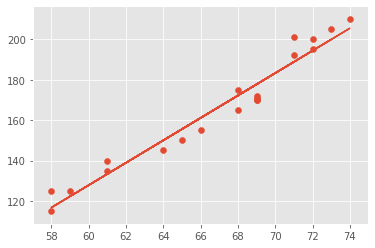

In [28]:
reg_plot = plt.figure()
ax = reg_plot.add_subplot(111)
ax.plot(x_height, Y_pred)
ax.scatter(x_height,y_weight)
plt.show()

In [ ]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 5.54
# Y-Intercept: -204.48
# R-Squared: 0.96
# ----------------------------
# Model: Y = 5.54 * x + -204.48

[72.52000000000001, 100.22, 222.1, 227.64000000000001]


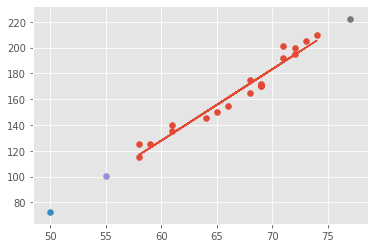

In [27]:
# Make prediction for x = 4.5 and visualize on the scatter plot

x_i = [50, 55, 77, 78]
y_i = list(map(lambda x: 5.54 * x + -204.48, x_i))
print(y_i)
reg_plot2 = plt.figure()
ax = reg_plot2.add_subplot(111)
ax.plot(x_height, y_pred)
ax.scatter(x_height, y_weight)
ax.scatter(x_i[0], y_i[0])
ax.scatter(x_i[1], y_i[1])
ax.scatter(x_i[2], y_i[2])
plt.show()